Sentiment analysis is a technique used to determine whether a text (like a review or a tweet) expresses a positive, negative, or neutral sentiment. It helps in understanding people’s opinions and feelings from written language.

The objective of sentiment analysis is to automatically identify and extract subjective information from text. It helps businesses and organizations understand public opinion, monitor brand reputation, improve customer service, and gain insights into market trends.

Three most popular type of Sentiment Analysis:

- Fine-grained Sentiment Analysis: This involves classifying sentiments into categories like very positive, positive, neutral, negative, and very negative.
- Aspect-based Sentiment Analysis: This focuses on identifying sentiments about specific aspects or features of a product or service, like the taste of food or the speed of service in a restaurant.
- Emotion Detection: This type categorizes text into different emotions such as happiness, anger, sadness, etc.

Sentiment analysis in Python involves using libraries and tools to analyze text data and determine its sentiment. Commonly used libraries include:

1. NLTK (Natural Language Toolkit): For text processing and classification.
2. TextBlob: For simple sentiment analysis and text processing.
3. VADER (Valence Aware Dictionary and sEntiment Reasoner): For analyzing social media texts.
4. Transformers (Hugging Face): For using pre-trained models to perform sentiment analysis.

In [1]:
#Pandas - data analysis and data manipulation
#Matplotlib - data visualization
#Seaborn - library based on matplotlib, providing a high-level interface for data visualization
#WordCloud -  visualize text data
#re - provides functions to pre-process the strings as per the given regular expression
#pip install wordcloud

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [2]:
from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Natural Language Processing
#nltk – (Natural Language Toolkit) a collection of libraries for natural language processing
#stopwords – a collection of words that don’t provide any meaning to a sentence
#WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
##Scikit-Learn (Machine Learning Library for Python)
#CountVectorizer – transform text to vectors
#GridSearchCV – for hyperparameter tuning
#RandomForestClassifier – machine learning algorithm for classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [5]:
#Evaluation Metrics
#Accuracy Score: no. of correctly classified instances/total no. of instances
#Precision Score: the ratio of correctly predicted instances over total positive instances
#Recall Score: the ratio of correctly predicted instances over total instances in that class
#Roc Curve: a plot of true positive rate against false positive rate
#Classification Report: report of precision, recall and f1 score
#Confusion Matrix: a table used to describe the classification models

#!pip install scikit-plot
#!pip install --upgrade scikit-plot
#!pip install scikit-learn==1.2.2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
#!pip install scipy==1.7.3

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
# %pip install scikit-plot
# !pip install --upgrade scikit-learn

Dataset consists of a sentence and its respective sentiment as a target variable. It contains 3 separate files named train.txt, test.txt and val.txt.

Source = https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [6]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [ ]:
#df_train.head()
#df_val.head()
#df_train.shape
#df_train.describe()

#### Concatenate these two data frames as we will be using cross validation and we have a seperate test dataset.

In [7]:
df = pd.concat([df_train,df_val])

In [8]:
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (18000, 2)


In [9]:
df.reset_index(inplace=True,drop=True)

In [10]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<AxesSubplot:xlabel='label', ylabel='count'>

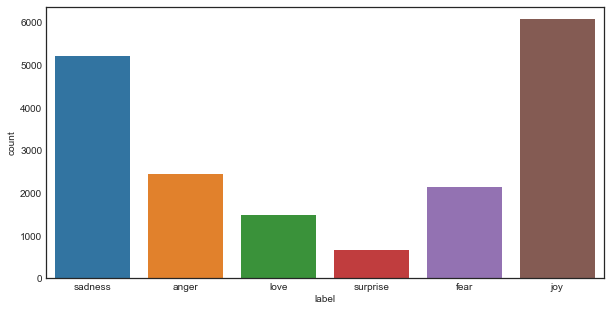

In [11]:
sns.countplot(df.label)

We could create a multi-class classifier for Sentiment Analysis using NLP, but to make it simple, we'll just merge the labels into 2 classes: positive and negative
1. Positive Sentiment - "joy","love","surprise"
2. Negative Sentiment - "anger","sadness","fear"

In [12]:
#Custom encoder to convert categorical target labels to numerical form, i.e. (0 and 1)
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [13]:
custom_encoder(df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

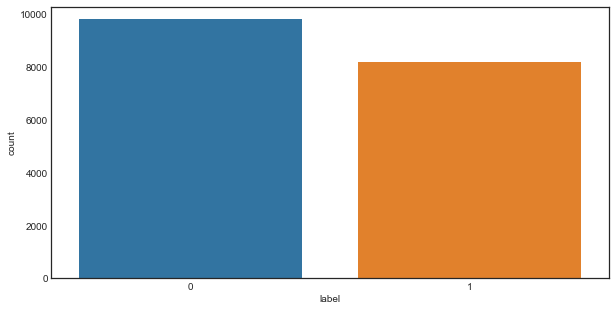

In [14]:
sns.countplot(df.label)

In [15]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


# Data preprocessing
* Get rid of any other characters apart from alphabets
* Convert the string to lowercase, as 2 different vectors would be created for the same word hence to avoid the situation.
* Check for stopwords (eg: “the”, “an”, “to”)
* Perform lemmatization on each word, (Changing the different forms of a word into a single item called a lemma; base form of a word; converting all occurrences of the same lexeme to their respective lemma)

In [16]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [17]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [18]:
#!pip install --upgrade nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
corpus = text_transformation(df['text'])

In [ ]:
#!pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud += " ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

# 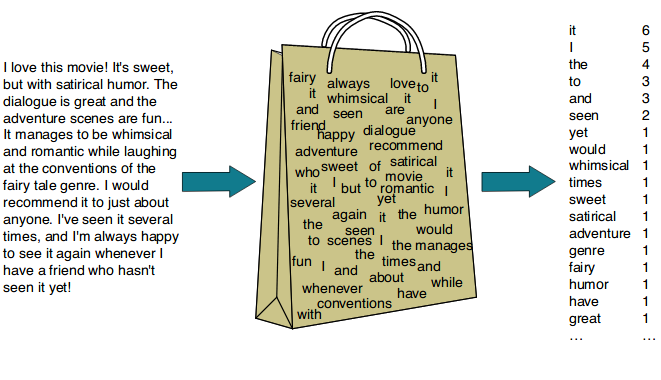


# Bag of Words
Reference: https://ogre51.medium.com/nlp-explain-bag-of-words-3b9fc4f211e8

It describes the total occurrence of words within a document.

Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer

Converting text data into vectors is a fundamental process in natural language processing (NLP) and machine learning. This transformation allows text to be represented in a numerical format, which can be used by machine learning algorithms for various tasks such as classification, clustering, and prediction.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#An n-gram is a contiguous sequence of 𝑛 items from a given text or speech data. In the context of natural language processing (NLP) and text analysis, these items are typically words or characters. The concept of n-grams helps in capturing the context and structure of text data.
#Types of N-grams: Unigrams, Bigrams, Trigrams, n-grams (Sequences of 𝑛 consecutive words or tokens, where 𝑛 can be any integer.)
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

#Machine learning model creation
* Model: Random Forest Classifier
* Tuning the hyperparameters using GridSearchCV

#GridSearchCV() will take the following parameters:

- Estimator or model: RandomForestClassifier
- parameter: dictionary of hyperparameter names and their values
- cv: signifies cross-validation folds
- return_train_score: returns the training scores of the various models
- n_jobs: no. of jobs to run parallelly (“-1” signifies that all CPU cores will be used which reduces the training time drastically)

In [25]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000],
             'max_depth': [10, None],
             'min_samples_split': [5],
             'min_samples_leaf': [1],
             'bootstrap': [True]}

#### Now, we will fit the data into grid search

In [26]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

#### Models and their respective parameters, mean test score and rank. 

In [27]:
for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.5451666666666666
Rank:  6
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.5448333333333333
Rank:  7
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.5455555555555556
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.5446666666666666
Rank:  8
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.9570555555555555
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': None, 'max

#### Choosing the best parameters obtained from GridSearchCV and creating a final random forest classifier model

In [28]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

Training our model

In [29]:
rfc.fit(X,y)

RandomForestClassifier(min_samples_split=5, n_estimators=500)

## Test Data Transformation

In [30]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [31]:
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

### Model Evaluation Metrics

Accuracy_score:  0.961
Precision_score:  0.9616228070175439
Recall_score:  0.9532608695652174
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1080
           1       0.96      0.95      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



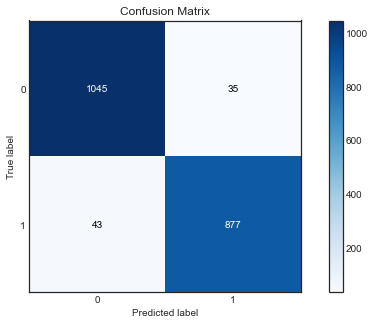

In [32]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)

In [33]:
predictions_probability = rfc.predict_proba(testdata)

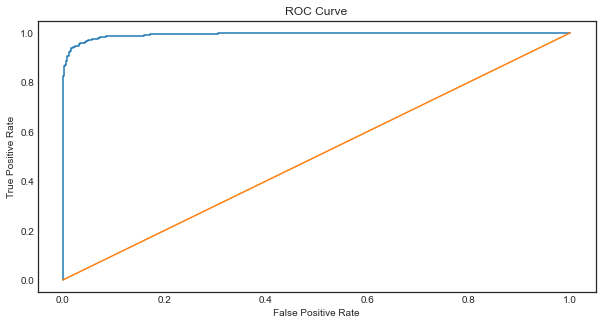

In [34]:
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Predict for Custom Input

In [35]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [36]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [37]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


Reference: Analytics Vidhya